In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
algos = ['byol', 'tribyol', 'imix', 'unmix', 'myol']
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
algos2name = {'byol': 'BYOL', 'tribyol': 'TriBYOL', 'unmix': 'Un-Mix', 'imix': 'i-Mix', 'myol': 'MYOL'}
epochs = list(range(100, 600, 100))
def plot_curve(legend=False):
    fig, ax = plt.subplots(figsize=(5,4))
    plt.tight_layout(pad=2.0)
    for i, algo in enumerate(algos):
        result = []
        stds = []
        for epoch in epochs:
            tmp = []
            for seed in range(3):
                if algo == 'myol':
                    file_name = f'linear_{algo}_sgd0.05_alpha2.0_gamma1.0_{seed}_statistics_{epoch}.csv'
                    df = pd.read_csv(f'ablation/{dataset}/results_{algo}_batch256/{file_name}')
                else:
                    file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
                    df = pd.read_csv(f'main_result/{dataset}/results_{algo}_batch256/{file_name}')
                tmp.append(df['test_acc@1'].values[-1])
            result.append(np.mean(tmp))
            stds.append(np.std(tmp))
        ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
        ax.set_xticks(epochs[:len(result)])
        print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
    plt.grid(axis='y', alpha=0.75, linestyle='--')
    plt.xlabel('Pre-training Epoch', fontsize=15)
    plt.ylabel('Accuracy (%)', fontsize=15)
    if legend:
        plt.legend(fontsize=15)
    plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
    plt.show()

BYOL[Epoch500] : 90.79+-0.12
TRIBYOL[Epoch500] : 90.25+-0.35
IMIX[Epoch500] : 92.26+-0.22
UNMIX[Epoch500] : 92.73+-0.09
MYOL[Epoch500] : 93.35+-0.12


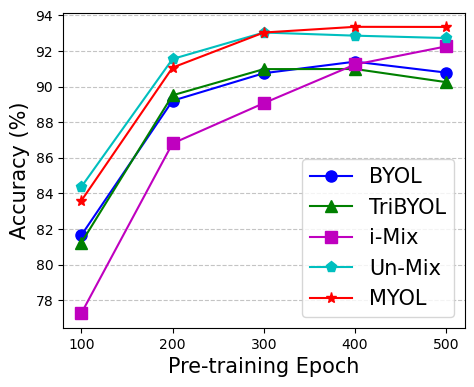

In [3]:
dataset = 'cifar10'
plot_curve(legend=True)

BYOL[Epoch500] : 65.93+-0.22
TRIBYOL[Epoch500] : 64.12+-0.16
IMIX[Epoch500] : 66.75+-0.24
UNMIX[Epoch500] : 68.65+-0.17
MYOL[Epoch500] : 70.49+-0.31


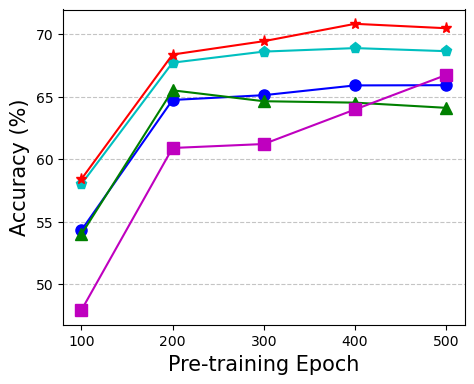

In [4]:
dataset = 'cifar100'
plot_curve()

BYOL[Epoch500] : 91.58+-0.32
TRIBYOL[Epoch500] : 91.81+-0.26
IMIX[Epoch500] : 91.09+-0.21
UNMIX[Epoch500] : 93.80+-0.13
MYOL[Epoch500] : 94.03+-0.28


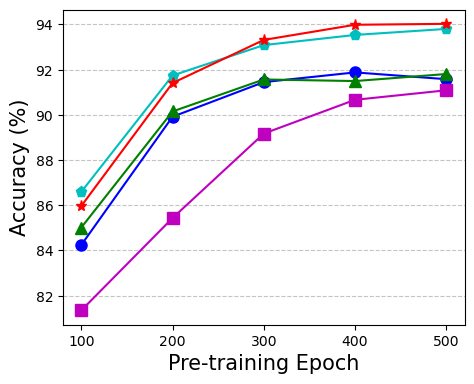

In [5]:
dataset = 'stl10'
plot_curve()

BYOL[Epoch500] : 51.10+-0.08
TRIBYOL[Epoch500] : 49.39+-0.40
IMIX[Epoch500] : 49.58+-0.26
UNMIX[Epoch500] : 53.53+-0.57
MYOL[Epoch500] : 55.72+-0.08


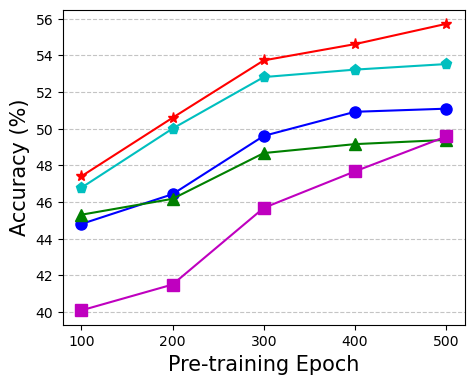

In [6]:
dataset = 'tinyimagenet'
plot_curve()

BYOL[Epoch500] : 51.10+-0.08
TRIBYOL[Epoch500] : 49.39+-0.40
IMIX[Epoch500] : 49.58+-0.26
UNMIX[Epoch500] : 53.53+-0.57
MYOL[Epoch500] : 55.72+-0.08


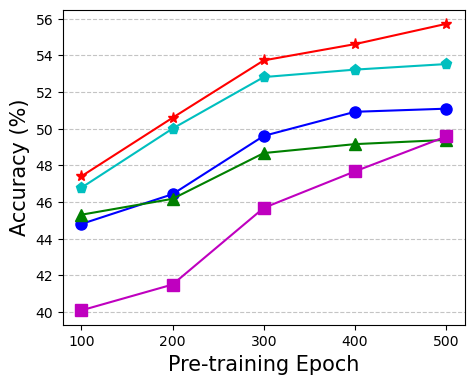

In [3]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            if algo == 'myol':
                file_name = f'linear_{algo}_sgd0.05_alpha2.0_gamma1.0_{seed}_statistics_{epoch}.csv'
                df = pd.read_csv(f'ablation/{dataset}/results_{algo}_batch256/{file_name}')
            else:
                file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
                df = pd.read_csv(f'main_result/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
plt.savefig(f'curve.pdf', format='pdf', dpi=1200)
# plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

BYOL[Epoch500] : 51.10+-0.08
TRIBYOL[Epoch500] : 49.39+-0.40
IMIX[Epoch500] : 49.58+-0.26
UNMIX[Epoch500] : 53.53+-0.57
MYOL[Epoch500] : 55.72+-0.08


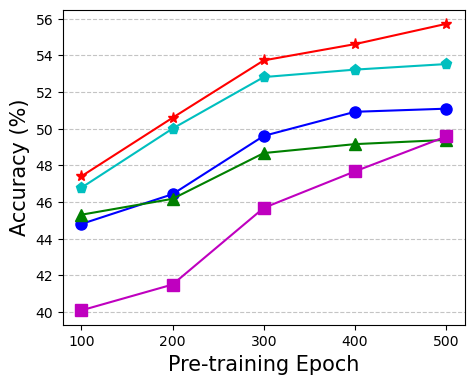

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            if algo == 'myol':
                file_name = f'linear_{algo}_sgd0.05_alpha2.0_gamma1.0_{seed}_statistics_{epoch}.csv'
                fpath = 'ablation'
            else:
                file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
                fpath = 'main_result'
            df = pd.read_csv(f'{fpath}/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
# plt.savefig(f'curve.pdf', format='pdf', dpi=1200)
# plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

In [15]:
dataset = 'cifar100'
epochs = list(range(100, 600, 100))

BYOL[Epoch500] : 65.93+-0.22
TRIBYOL[Epoch500] : 64.12+-0.16
IMIX[Epoch500] : 66.75+-0.24
UNMIX[Epoch500] : 68.65+-0.17
MYOL[Epoch500] : 70.26+-0.46


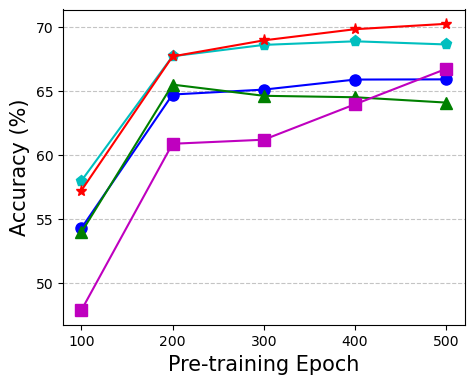

In [16]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
            df = pd.read_csv(f'main_result/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

BYOL[Epoch500] : 65.93+-0.22
TRIBYOL[Epoch500] : 64.12+-0.16
IMIX[Epoch500] : 66.75+-0.24
UNMIX[Epoch500] : 68.65+-0.17
MYOL[Epoch500] : 70.49+-0.31


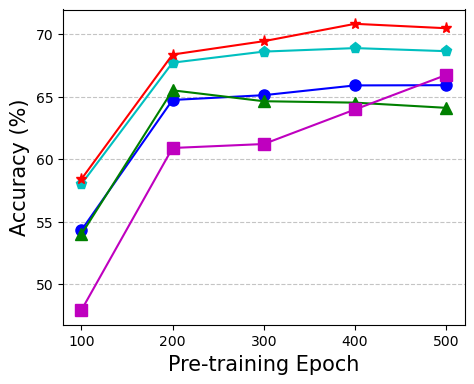

In [17]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            if algo == 'myol':
                file_name = f'linear_{algo}_sgd0.05_alpha2.0_gamma1.0_{seed}_statistics_{epoch}.csv'
                fpath = 'ablation'
            else:
                file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
                fpath = 'main_result'
            df = pd.read_csv(f'{fpath}/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
# plt.savefig(f'curve.pdf', format='pdf', dpi=1200)
# plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

In [9]:
dataset = 'cifar10'
epochs = list(range(100, 600, 100))

BYOL[Epoch500] : 90.79+-0.12
TRIBYOL[Epoch500] : 90.25+-0.35
IMIX[Epoch500] : 92.26+-0.22
UNMIX[Epoch500] : 92.73+-0.09
MYOL[Epoch500] : 93.10+-0.03


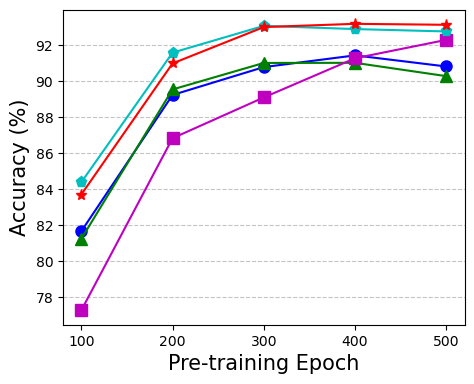

In [10]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
            df = pd.read_csv(f'main_result/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

BYOL[Epoch500] : 90.79+-0.12
TRIBYOL[Epoch500] : 90.25+-0.35
IMIX[Epoch500] : 92.26+-0.22
UNMIX[Epoch500] : 92.73+-0.09
MYOL[Epoch500] : 93.35+-0.12


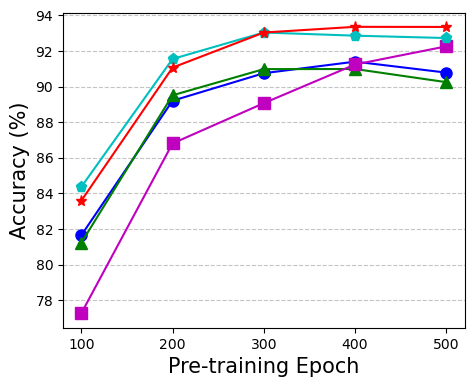

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            if algo == 'myol':
                file_name = f'linear_{algo}_sgd0.05_alpha2.0_gamma1.0_{seed}_statistics_{epoch}.csv'
                fpath = 'ablation'
            else:
                file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
                fpath = 'main_result'
            df = pd.read_csv(f'{fpath}/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
# plt.savefig(f'curve.pdf', format='pdf', dpi=1200)
# plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

In [12]:
dataset = 'stl10'
epochs = list(range(100, 600, 100))

BYOL[Epoch500] : 91.58+-0.32
TRIBYOL[Epoch500] : 91.81+-0.26
IMIX[Epoch500] : 91.09+-0.21
UNMIX[Epoch500] : 93.80+-0.13
MYOL[Epoch500] : 93.70+-0.08


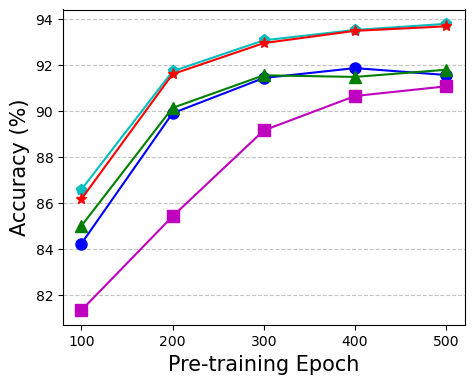

In [13]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
            df = pd.read_csv(f'main_result/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()

BYOL[Epoch500] : 91.58+-0.32
TRIBYOL[Epoch500] : 91.81+-0.26
IMIX[Epoch500] : 91.09+-0.21
UNMIX[Epoch500] : 93.80+-0.13
MYOL[Epoch500] : 94.03+-0.28


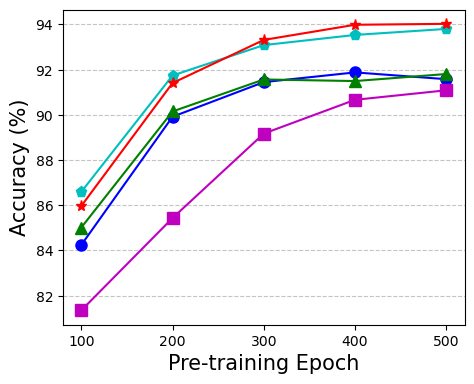

In [14]:
fig, ax = plt.subplots(figsize=(5,4))
plt.tight_layout(pad=2.0)
colors = ['b', 'g', 'm', 'c', 'r']
markers = ['o', '^', 's', 'p', '*']
for i, algo in enumerate(algos):
    result = []
    stds = []
    for epoch in epochs:
        tmp = []
        for seed in range(3):
            if algo == 'myol':
                file_name = f'linear_{algo}_sgd0.05_alpha2.0_gamma1.0_{seed}_statistics_{epoch}.csv'
                fpath = 'ablation'
            else:
                file_name = f'linear_{algo}_sgd0.05_cosFalse_2048_{seed}_statistics_{epoch}.csv'
                fpath = 'main_result'
            df = pd.read_csv(f'{fpath}/{dataset}/results_{algo}_batch256/{file_name}')
            tmp.append(df['test_acc@1'].values[-1])
        result.append(np.mean(tmp))
        stds.append(np.std(tmp))
    ax.plot(epochs[:len(result)], result, f'{markers[i]}-', color=colors[i], markersize=8, label=f'{algos2name[algo]}')
    ax.set_xticks(epochs[:len(result)])
    print(f'{algo.upper()}[Epoch{100*len(result)}] : {result[-1]:.2f}+-{stds[-1]:.2f}')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlabel('Pre-training Epoch', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
# plt.title(f'{dataset.upper()}')
# plt.legend(fontsize=15)
# plt.savefig(f'curve.pdf', format='pdf', dpi=1200)
# plt.savefig(f'{dataset}_curve.pdf', format='pdf', dpi=1200)
plt.show()